In [1]:
!nvidia-smi

Sat Sep 20 10:37:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
!pip install ultralytics

# Import and use YOLOv8
from ultralytics import YOLO

# Load the pre-trained YOLOv8 nano model
model = YOLO("yolov8n.pt")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import zipfile
import os

# Name of your uploaded file
zip_file = "football-players-detection.v1i.yolov8.zip"

# Unzip to a folder (e.g., 'dataset')
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Check the folder structure
os.listdir("dataset")

['data.yaml',
 'train',
 'valid',
 'test',
 'README.dataset.txt',
 'README.roboflow.txt']

In [ ]:
import os

for root, dirs, files in os.walk("dataset"):  # use your folder name
    level = root.replace("dataset", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:5]:  # show first 5 files per folder
        print(f"{subindent}{f}")


dataset/
    data.yaml
    README.dataset.txt
    README.roboflow.txt
    train/
        labels/
            4b770a_9_8_png.rf.73518c924fa04008c75b94bb3a22741f.txt
            2e57b9_7_10_png.rf.41b9efb8da3faafd60704d8027ce2f5c.txt
            798b45_5_6_png.rf.1c943351adc47cae9fa69671df9f0111.txt
            4b770a_7_2_png.rf.03e7a324879b7716068bb333c014bb63.txt
            4b770a_1_7_png.rf.139ff226f96dbb92e0daa0fd6a548b4b.txt
        images/
            573e61_7_9_png.rf.4fbd743fad2b4a46d692c2b09a272a64.jpg
            2e57b9_5_8_png.rf.1ade04d3a33e50625106d1605a13516f.jpg
            4b770a_7_6_png.rf.4ffb8e2c7f2bff6bdd93690c0ccaa0a5.jpg
            538438_9_5_png.rf.ba176ad5cace898ef9db3a02f4b2e4fb.jpg
            573e61_9_7_png.rf.e368aff8fac0c5d33cd61b073358357b.jpg
    valid/
        labels/
            42ba34_7_1_png.rf.e276058b026320a5eea8f6a535325f4d.txt
            538438_1_5_png.rf.c865b884a6305171d8c46618333c6c47.txt
            2e57b9_3_8_png.rf.6a24c7673201b1c79745edb58

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # or yolov8s.pt for small model

results = model.train(
    data="dataset/data.yaml",  # path to your YAML file
    epochs=100,
    imgsz=1920,
    batch=4,
    name = "football_model"
)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1920, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=football_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

In [ ]:
import os

test_images = os.listdir("dataset/test/images")
print(len(test_images))
print(test_images)

25
['08fd33_3_6_png.rf.d338a9f970c32d62d5e5e7164a41de16.jpg', '538438_5_2_png.rf.4a3d6f91225f9e2bdcd46443f3cdfaab.jpg', '4b770a_5_1_png.rf.a7c6e28b5662a21ad50852a5794a6bb8.jpg', '4b770a_3_9_png.rf.4671db0c6490d18ae6ee54a22525d18a.jpg', '744b27_1_10_png.rf.46dcbacc03adcf50d34a9cc911fb4c13.jpg', '4b770a_1_4_png.rf.f442cb7d114b280003d7056e7e1009f9.jpg', 'a9f16c_2_10_png.rf.016461cf22981d477424904b720ae8ba.jpg', '08fd33_9_3_png.rf.cc58522078f196d61827a57f1e099ad3.jpg', '4b770a_1_6_png.rf.6afe0bb65796fc29cdc46c49a0c77bce.jpg', '4b770a_9_3_png.rf.c8e1ce7daba87f9962a9953bf2bf7cab.jpg', '573e61_1_9_png.rf.373cd1b763954000928ba0c1e8f0196b.jpg', '744b27_7_4_png.rf.0054990d0ed402a4bba2dffc96619035.jpg', '798b45_3_10_png.rf.c0b33af0b56cacaf32170e5fef6d38ac.jpg', '538438_3_6_png.rf.865ec172cb5b90ba77c80b3890643225.jpg', '42ba34_5_5_png.rf.2f4f9a4556df17ffb9e460e8d3991823.jpg', '798b45_3_3_png.rf.8665766ee1438f0e829fbbb3a54e8d08.jpg', '4b770a_9_4_png.rf.814988a44d6f44969d767d89af0ea7c7.jpg', '42ba34


image 1/1 /content/dataset/test/images/4b770a_9_4_png.rf.814988a44d6f44969d767d89af0ea7c7.jpg: 1088x1920 1 ball, 1 goalkeeper, 23 players, 3 referees, 1669.6ms
Speed: 16.7ms preprocess, 1669.6ms inference, 12.1ms postprocess per image at shape (1, 3, 1088, 1920)
Results saved to /content/runs/detect/predict3


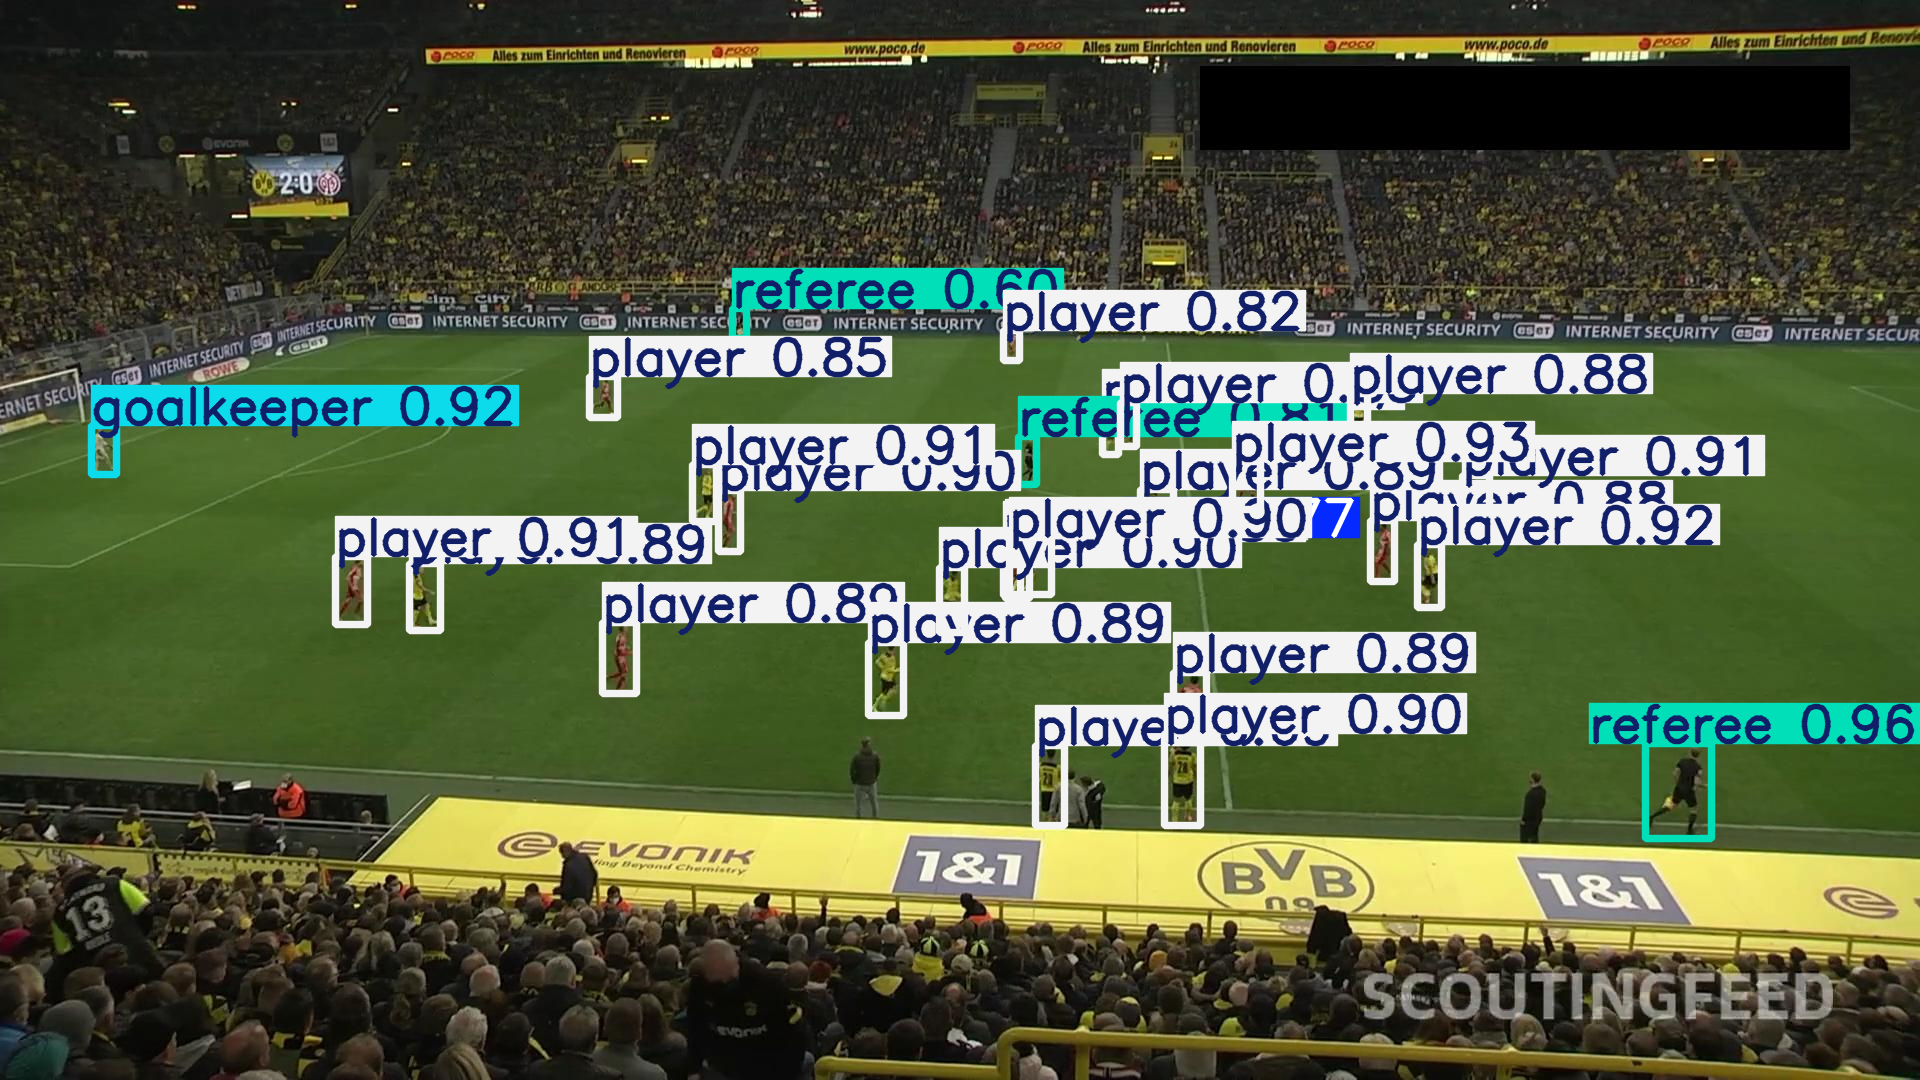

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("best.pt")

# Run inference on a test image
results = model.predict("/content/dataset/test/images/4b770a_9_4_png.rf.814988a44d6f44969d767d89af0ea7c7.jpg", save=True)

# Check results
results[0].show()

## Install dependencjes

**Note:** Let's install the `inference-gpu` library, which will be used to efficiently run our object detection and keypoint detection models on GPUs.

In [2]:
!pip install -q gdown inference-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.1/190.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Note:** Let's install the sports repository directly from GitHub. The sports repository contains a variety of football-related utilities that we'll use along the way.

In [3]:
!pip install -q git+https://github.com/roboflow/sports.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.56.0 requires tokenizers<0.22.0,>=0.19.0, but you have tokenizers 0.22.1 which is incompatible.


**Note:** Let's make sure we have the latest features in the supervision library by installing version `0.23.0` or higher.

In [4]:
!pip list | grep supervision

supervision                           0.26.1


**Note:** Let's download a few sample videos from the [DFL - Bundesliga Data Shootout](https://www.kaggle.com/competitions/dfl-bundesliga-data-shootout) Kaggle competition using gdown.



In [5]:
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 24.3MB/s]


In [6]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

### Configure your API keys

- Open your [`HuggingFace Settings`](https://huggingface.co/settings) page. Click `Access Tokens` then `New Token` to generate new token.
- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑).
    - Store HuggingFace Access Token under the name `HF_TOKEN`.
    - Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [7]:
import os
from google.colab import userdata

os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")
os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

## ball, player, goalkeeper and referee detection

In [12]:
from inference import get_model
from google.colab import userdata

PLAYER_DETECTION_MODEL = YOLO("best.pt")

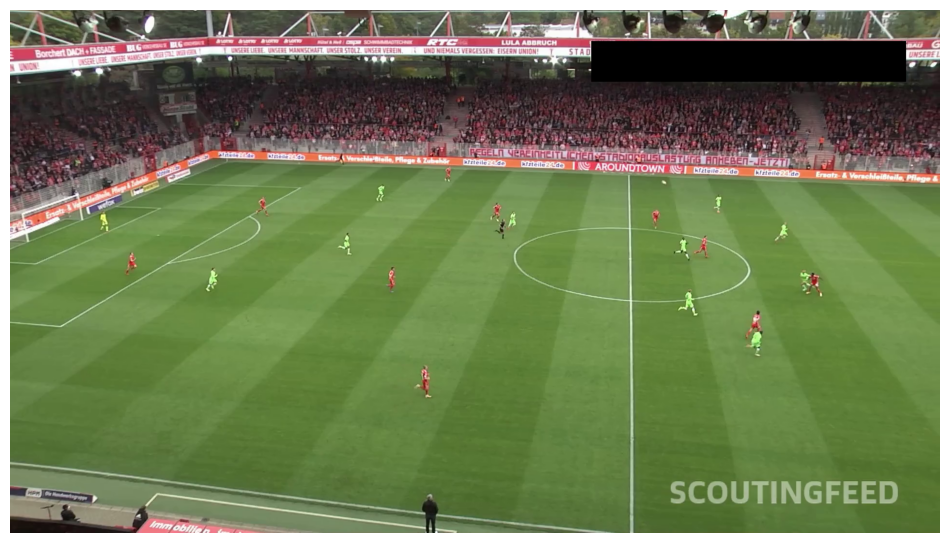

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)


0: 736x1280 1 ball, 1 goalkeeper, 22 players, 2 referees, 12.7ms
Speed: 8.2ms preprocess, 12.7ms inference, 14.6ms postprocess per image at shape (1, 3, 736, 1280)


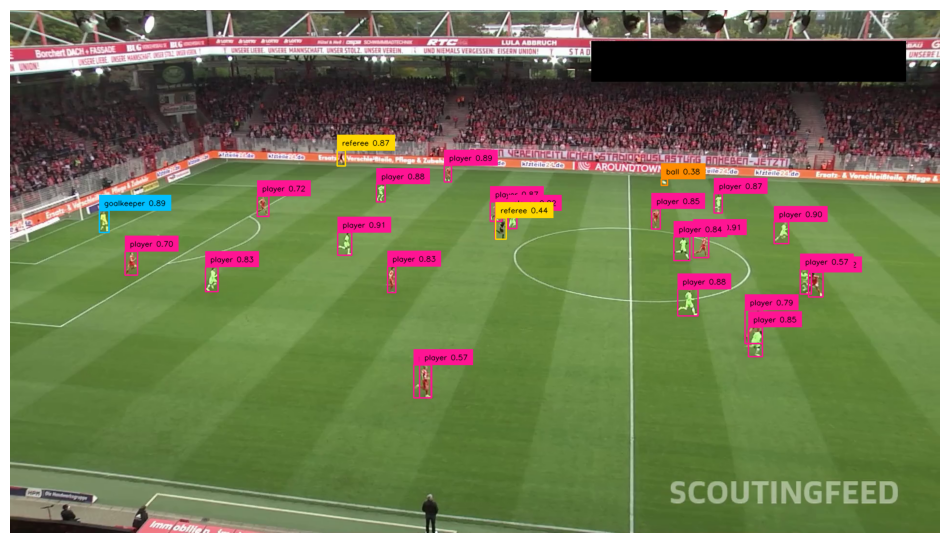

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

# Annotators
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

# Get a frame from the video
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# Run local YOLO inference
results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)

# Convert to supervision detections
detections = sv.Detections.from_ultralytics(results[0])

# Build labels
labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

# Annotate frame
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections)
annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

# Show annotated frame
sv.plot_image(annotated_frame)

GENERATING VIDEO

In [30]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
OUTPUT_VIDEO_PATH = "/content/121364_0_OUTPUT_1.mp4"

# Video info
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# Annotators
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

# Video writer
with sv.VideoSink(OUTPUT_VIDEO_PATH, video_info) as sink:
    for frame in sv.get_video_frames_generator(SOURCE_VIDEO_PATH):
        # Run detection with YOLO
        results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
        detections = sv.Detections.from_ultralytics(results[0])

        # Labels
        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections['class_name'], detections.confidence)
        ]

        # Annotate frame
        annotated_frame = box_annotator.annotate(scene=frame.copy(), detections=detections)
        annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

        # Write frame
        sink.write_frame(annotated_frame)

print(f"✅ Annotated video saved at {OUTPUT_VIDEO_PATH}")


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 13.9ms
Speed: 8.7ms preprocess, 13.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 13.9ms
Speed: 9.4ms preprocess, 13.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.6ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 13.9ms
Speed: 9.9ms preprocess, 13.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)

0

## video game style visualization


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 79.1ms
Speed: 13.6ms preprocess, 79.1ms inference, 199.2ms postprocess per image at shape (1, 3, 1088, 1920)


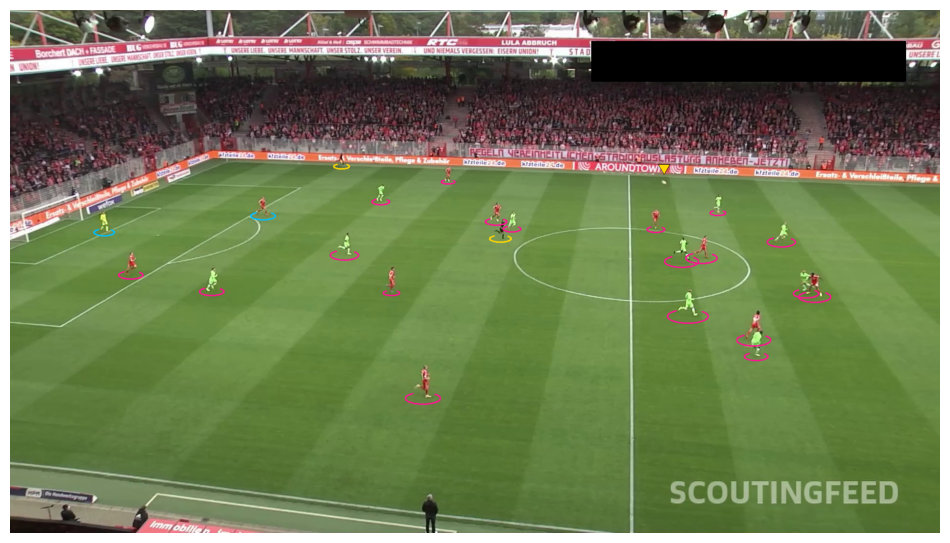

In [13]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0

# Annotators
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Get first frame
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# Run YOLO inference
results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
detections = sv.Detections.from_ultralytics(results[0])

# Separate ball and other detections
ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1  # optional adjustment depending on your classes

# Annotate frame
annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=all_detections)
annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)

# Show annotated frame
sv.plot_image(annotated_frame)

GENERATING VIDEO

In [14]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
OUTPUT_VIDEO_PATH = "/content/121364_0_OUTPUT_2.mp4"
BALL_ID = 0

# Get video info
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# Annotators
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Video writer
with sv.VideoSink(OUTPUT_VIDEO_PATH, video_info) as sink:
    for frame in sv.get_video_frames_generator(SOURCE_VIDEO_PATH):
        # Run YOLO inference
        results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
        detections = sv.Detections.from_ultralytics(results[0])

        # Separate ball vs players
        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections.class_id -= 1  # shift IDs

        # Annotate frame
        annotated_frame = frame.copy()
        annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=all_detections)
        annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)

        # Write frame
        sink.write_frame(annotated_frame)

print(f"✅ Annotated video saved at {OUTPUT_VIDEO_PATH}")


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 24.7ms
Speed: 12.6ms preprocess, 24.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 25.9ms
Speed: 14.9ms preprocess, 25.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.7ms
Speed: 24.9ms preprocess, 24.7ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.7ms
Speed: 11.8ms preprocess, 24.7ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.7ms
Speed: 10.4ms preprocess, 24.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.7ms
Speed: 14.1ms preprocess, 24.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 19

## player tracking


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 24.7ms
Speed: 9.4ms preprocess, 24.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)


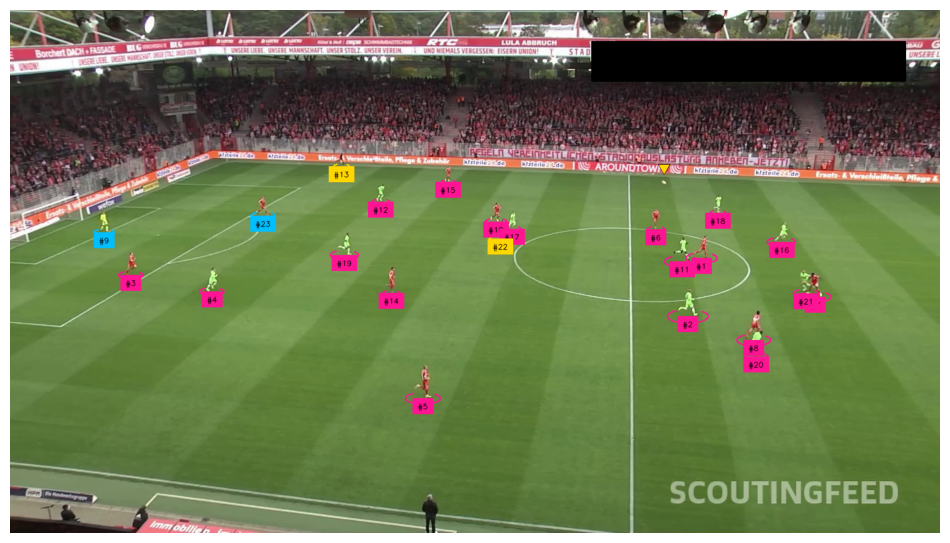

In [15]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0

# Annotators
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Tracker
tracker = sv.ByteTrack()
tracker.reset()

# Get first frame
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# Run YOLO inference
results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
detections = sv.Detections.from_ultralytics(results[0])

# Separate ball vs other objects
ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1
all_detections = tracker.update_with_detections(detections=all_detections)

# Build tracker labels
labels = [f"#{tracker_id}" for tracker_id in all_detections.tracker_id]

# Annotate frame
annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=all_detections)
annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=all_detections, labels=labels)
annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)

# Show annotated frame
sv.plot_image(annotated_frame)

GENERATING VIDEO

In [17]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
OUTPUT_VIDEO_PATH = "/content/121364_0_OUTPUT_3.mp4"
BALL_ID = 0

# Get video info
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# Annotators
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Tracker
tracker = sv.ByteTrack()
tracker.reset()

# Video writer
with sv.VideoSink(OUTPUT_VIDEO_PATH, video_info) as sink:
    for frame in sv.get_video_frames_generator(SOURCE_VIDEO_PATH):
        # Run YOLO inference
        results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
        detections = sv.Detections.from_ultralytics(results[0])

        # Ball detections
        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        # Player detections
        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections.class_id -= 1
        all_detections = tracker.update_with_detections(detections=all_detections)

        # Labels for tracked players
        labels = [f"#{int(tid)}" for tid in (all_detections.tracker_id.tolist() if all_detections.tracker_id is not None else [])]

        # Annotate frame
        annotated_frame = frame.copy()
        annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=all_detections)
        annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=all_detections, labels=labels)
        annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)

        # Save frame
        sink.write_frame(annotated_frame)

print(f"✅ Annotated tracking video saved at {OUTPUT_VIDEO_PATH}")


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 55.0ms
Speed: 25.0ms preprocess, 55.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 27.2ms
Speed: 31.3ms preprocess, 27.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 49.1ms
Speed: 22.9ms preprocess, 49.1ms inference, 8.9ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 31.2ms
Speed: 43.8ms preprocess, 31.2ms inference, 6.2ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 36.7ms
Speed: 20.5ms preprocess, 36.7ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.7ms
Speed: 9.6ms preprocess, 24.7ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 192

## split players into teams

![football AI diagram](https://media.roboflow.com/notebooks/examples/football-ai-team-clustering.png)

**Note:** Before training our player clustering model, we need to gather training data. To do this, we'll sample one frame per second, detect players within those frames, and then crop them out.

In [19]:
from tqdm import tqdm
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
PLAYER_ID = 2
STRIDE = 30

# Get frames with stride
frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE
)

crops = []

for frame in tqdm(frame_generator, desc='collecting crops'):
    # Run YOLO inference
    results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
    detections = sv.Detections.from_ultralytics(results[0])

    # Apply NMS
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)

    # Filter by player ID
    detections = detections[detections.class_id == PLAYER_ID]

    # Crop player regions
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops

collecting crops: 0it [00:00, ?it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 24.3ms
Speed: 8.4ms preprocess, 24.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 1it [00:00,  9.61it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.3ms
Speed: 11.5ms preprocess, 24.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 2it [00:00,  4.85it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 24.2ms
Speed: 11.8ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 3it [00:00,  4.30it/s]


0: 1088x1920 20 players, 2 referees, 24.2ms
Speed: 13.4ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 4it [00:00,  3.96it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 24.2ms
Speed: 9.8ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 5it [00:01,  3.80it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 24.2ms
Speed: 12.1ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 6it [00:01,  3.79it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 24.2ms
Speed: 10.3ms preprocess, 24.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 7it [00:01,  3.75it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 24.2ms
Speed: 11.6ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 8it [00:02,  3.69it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 12.2ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 9it [00:02,  3.71it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 11.5ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 10it [00:02,  3.65it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 9.0ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 11it [00:02,  3.51it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 9.8ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 12it [00:03,  3.56it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 11.8ms preprocess, 24.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 13it [00:03,  3.59it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 24.2ms
Speed: 13.7ms preprocess, 24.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 14it [00:03,  3.60it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 11.4ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 15it [00:04,  3.54it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 13.1ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 16it [00:04,  3.57it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 13.4ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 17it [00:04,  3.46it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 24.1ms
Speed: 11.3ms preprocess, 24.1ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 18it [00:04,  3.57it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.3ms
Speed: 12.6ms preprocess, 24.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 19it [00:05,  3.04it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 25.8ms
Speed: 20.2ms preprocess, 25.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 20it [00:05,  2.72it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 21.6ms preprocess, 24.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 21it [00:06,  2.53it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 27.2ms
Speed: 15.9ms preprocess, 27.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 22it [00:06,  2.45it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 24.2ms
Speed: 18.9ms preprocess, 24.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 23it [00:07,  2.33it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 14.7ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 24it [00:07,  2.54it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 11.3ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 25it [00:07,  3.16it/s]


**Note:** Here's a sample (100 elements) of the crops we've gathered.

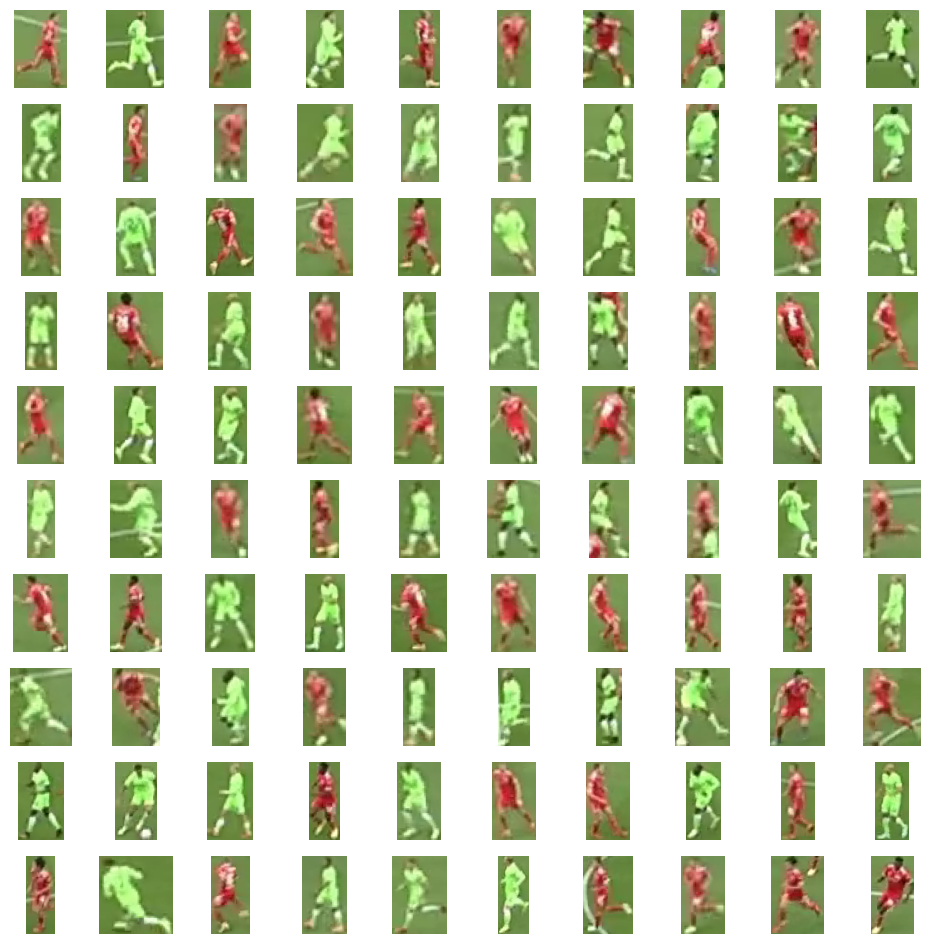

In [20]:
sv.plot_images_grid(crops[:100], grid_size=(10, 10))

**Note:** Next, we'll run [SigLIP](https://huggingface.co/docs/transformers/en/model_doc/siglip) to calculate embeddings for each of the crops.

In [21]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)

config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [22]:
import numpy as np
from more_itertools import chunked

BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []
with torch.no_grad():
    for batch in tqdm(batches, desc='embedding extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

embedding extraction: 16it [00:06,  2.67it/s]


**Note:** Using [UMAP](https://github.com/lmcinnes/umap), we project our embeddings from `(N, 768)` to `(N, 3)` and then perform a two-cluster division using [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [23]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [24]:
projections = REDUCER.fit_transform(data)
clusters = CLUSTERING_MODEL.fit_predict(projections)

**Note:** To simplify the use of the SigLIP, UMAP, and KMeans combo, I've packaged all these models into a [`TeamClassifier`](https://github.com/roboflow/sports/blob/06053616f1f8a8ae1fa936eb00dcdc2e4f888bb1/sports/common/team.py#L41) that you can find in the [sports](https://github.com/roboflow/sports) repository.

In [25]:
import supervision as sv
from tqdm import tqdm
from sports.common.team import TeamClassifier

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
PLAYER_ID = 2
STRIDE = 30

# Get frames with stride
frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE
)

crops = []

for frame in tqdm(frame_generator, desc='collecting crops'):
    # Run YOLO inference
    results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
    detections = sv.Detections.from_ultralytics(results[0])

    # Filter by player ID
    players_detections = detections[detections.class_id == PLAYER_ID]

    # Crop player regions
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
    crops += players_crops

# Fit team classifier
team_classifier = TeamClassifier(device="cuda")
team_classifier.fit(crops)

collecting crops: 0it [00:00, ?it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 24.3ms
Speed: 9.0ms preprocess, 24.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 1it [00:00,  9.49it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.3ms
Speed: 14.6ms preprocess, 24.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 2it [00:00,  4.86it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 24.3ms
Speed: 16.5ms preprocess, 24.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 3it [00:00,  3.44it/s]


0: 1088x1920 20 players, 2 referees, 24.2ms
Speed: 19.7ms preprocess, 24.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 4it [00:01,  2.81it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 24.2ms
Speed: 18.9ms preprocess, 24.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 5it [00:01,  2.56it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 24.2ms
Speed: 20.9ms preprocess, 24.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 6it [00:02,  2.47it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 24.2ms
Speed: 12.1ms preprocess, 24.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 7it [00:02,  2.43it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 24.2ms
Speed: 10.3ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 8it [00:02,  2.53it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 10.9ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 9it [00:03,  2.79it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 10.5ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 10it [00:03,  2.98it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 10.4ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 11it [00:03,  3.13it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.3ms
Speed: 9.7ms preprocess, 24.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 12it [00:04,  3.31it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 10.1ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 13it [00:04,  3.41it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 24.2ms
Speed: 9.5ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 14it [00:04,  3.49it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 13.6ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 15it [00:04,  3.55it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 11.6ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 16it [00:05,  3.51it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 16.7ms preprocess, 24.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 17it [00:05,  3.59it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 24.2ms
Speed: 14.5ms preprocess, 24.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 18it [00:05,  3.69it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 11.4ms preprocess, 24.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 19it [00:05,  3.73it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 9.9ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 20it [00:06,  3.65it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 10.0ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 21it [00:06,  3.70it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 24.2ms
Speed: 16.6ms preprocess, 24.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 22it [00:06,  3.77it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 24.1ms
Speed: 12.8ms preprocess, 24.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 23it [00:06,  3.74it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 13.6ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 24it [00:07,  3.73it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 24.2ms
Speed: 11.7ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)


collecting crops: 25it [00:07,  3.24it/s]


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding extraction: 16it [00:06,  2.59it/s]


**Note:** Time to assign goalkeepers to teams. We'll use a simple heuristic: calculate the average position (centroid) of the players belonging to both teams and then assign the goalkeeper to the team whose average position is closer.

In [26]:
import numpy as np
import supervision as sv

def resolve_goalkeepers_team_id(
    players: sv.Detections,
    goalkeepers: sv.Detections
) -> np.ndarray:
    goalkeepers_xy = goalkeepers.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    players_xy = players.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    team_0_centroid = players_xy[players.class_id == 0].mean(axis=0)
    team_1_centroid = players_xy[players.class_id == 1].mean(axis=0)
    goalkeepers_team_id = []
    for goalkeeper_xy in goalkeepers_xy:
        dist_0 = np.linalg.norm(goalkeeper_xy - team_0_centroid)
        dist_1 = np.linalg.norm(goalkeeper_xy - team_1_centroid)
        goalkeepers_team_id.append(0 if dist_0 < dist_1 else 1)

    return np.array(goalkeepers_team_id)


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 24.2ms
Speed: 12.8ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.45it/s]


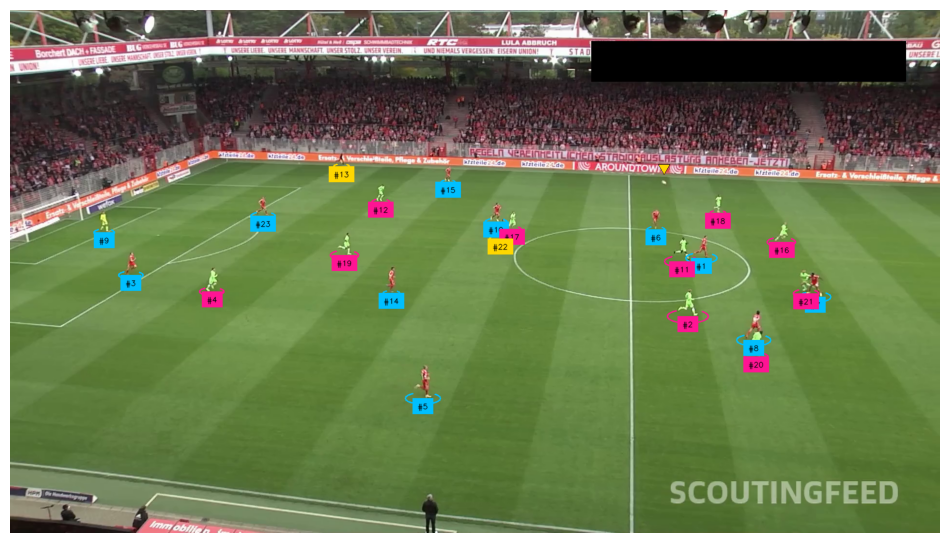

In [27]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

# Annotators
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Tracker
tracker = sv.ByteTrack()
tracker.reset()

# Get first frame
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# YOLO inference
results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
detections = sv.Detections.from_ultralytics(results[0])

# Ball detections
ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

# All other objects
all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections = tracker.update_with_detections(detections=all_detections)

# Separate classes
goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
players_detections = all_detections[all_detections.class_id == PLAYER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

# Team classification for players
players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
players_detections.class_id = team_classifier.predict(players_crops)

# Resolve goalkeepers team
goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
    players_detections, goalkeepers_detections
)

# Adjust referees class IDs
referees_detections.class_id -= 1

# Merge all detections
all_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections, referees_detections
])

# Build tracker labels
labels = [f"#{tracker_id}" for tracker_id in all_detections.tracker_id]

all_detections.class_id = all_detections.class_id.astype(int)

# Annotate frame
annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=all_detections)
annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=all_detections, labels=labels)
annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)

# Show annotated frame
sv.plot_image(annotated_frame)

GENERATING VIDEO

In [29]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
TARGET_VIDEO_PATH = "/content/121364_0_output_4.mp4"

BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

# Annotators
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Tracker
tracker = sv.ByteTrack()
tracker.reset()

# Open video
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

with sv.VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in frame_generator:
        # YOLO inference
        results = PLAYER_DETECTION_MODEL.predict(frame, conf=0.3)
        detections = sv.Detections.from_ultralytics(results[0])

        # Ball detections
        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        # All other objects
        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections = tracker.update_with_detections(detections=all_detections)

        # Separate classes
        goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
        players_detections = all_detections[all_detections.class_id == PLAYER_ID]
        referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

        # Team classification for players
        players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
        players_detections.class_id = team_classifier.predict(players_crops)

        # Resolve goalkeepers team
        goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
            players_detections, goalkeepers_detections
        )

        # Adjust referees class IDs
        referees_detections.class_id -= 1

        # Merge all detections
        all_detections = sv.Detections.merge([
            players_detections, goalkeepers_detections, referees_detections
        ])

        # Build tracker labels (fix numpy array issue)
        labels = [f"#{int(tid)}" for tid in (all_detections.tracker_id.tolist() if all_detections.tracker_id is not None else [])]

        all_detections.class_id = all_detections.class_id.astype(int)

        # Annotate frame
        annotated_frame = frame.copy()
        annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=all_detections)
        annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=all_detections, labels=labels)
        annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)

        # Write frame to output video
        sink.write_frame(annotated_frame)

print(f"✅ Annotated video saved at {TARGET_VIDEO_PATH}")


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 26.2ms
Speed: 9.7ms preprocess, 26.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.32it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 15.6ms
Speed: 16.2ms preprocess, 15.6ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.84it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.4ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.80it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.4ms
Speed: 9.4ms preprocess, 14.4ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.26it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 25.5ms
Speed: 23.4ms preprocess, 25.5ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.90it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 10.4ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.94it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.7ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 3 referees, 14.0ms
Speed: 9.5ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.13it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.70it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.80it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 16.0ms
Speed: 10.1ms preprocess, 16.0ms inference, 2.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.08it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 11.8ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.76it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 14.0ms
Speed: 12.0ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.74it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 12.2ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.77it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 15.3ms
Speed: 14.2ms preprocess, 15.3ms inference, 4.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.46it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.7ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.80it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.6ms
Speed: 9.6ms preprocess, 14.6ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.82it/s]

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 35.5ms
Speed: 33.5ms preprocess, 35.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.20it/s]

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 24.1ms
Speed: 24.7ms preprocess, 24.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.09it/s]



0: 1088x1920 1 goalkeeper, 22 players, 2 referees, 14.6ms
Speed: 22.6ms preprocess, 14.6ms inference, 2.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.96it/s]

0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 25.5ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 16.4ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.65it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 22.6ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.83it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.1ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.73it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 28.8ms
Speed: 12.9ms preprocess, 28.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 26.7ms preprocess, 14.0ms inference, 2.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.79it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 11.8ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.71it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 14.2ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 13.0ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 34.3ms
Speed: 13.7ms preprocess, 34.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.59it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 15.2ms
Speed: 15.4ms preprocess, 15.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 17.7ms
Speed: 25.3ms preprocess, 17.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  2.69it/s]



0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 40.1ms
Speed: 18.9ms preprocess, 40.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.67it/s]



0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 39.2ms
Speed: 31.3ms preprocess, 39.2ms inference, 27.8ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.57it/s]



0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 32.4ms
Speed: 33.2ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.89it/s]

0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 32.4ms
Speed: 25.8ms preprocess, 32.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.27it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 17.0ms
Speed: 9.7ms preprocess, 17.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.86it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.4ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.85it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 16.4ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.84it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.63it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.76it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 15.0ms
Speed: 9.7ms preprocess, 15.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.79it/s]

0: 1088x1920 1 goalkeeper, 22 players, 2 referees, 14.0ms
Speed: 23.1ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.44it/s]



0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 25.6ms
Speed: 16.6ms preprocess, 25.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.09it/s]



0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 16.2ms
Speed: 24.6ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.86it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 22.0ms
Speed: 24.9ms preprocess, 22.0ms inference, 9.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.29it/s]

0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 28.4ms
Speed: 52.7ms preprocess, 28.4ms inference, 4.9ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.83it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 3 referees, 23.8ms
Speed: 28.3ms preprocess, 23.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.07it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 12.1ms preprocess, 14.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.15it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 12.3ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.77it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 16.9ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.80it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 10.0ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.1ms
Speed: 14.2ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 18.1ms
Speed: 9.4ms preprocess, 18.1ms inference, 3.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 13.4ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.6ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.77it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 16.2ms
Speed: 10.8ms preprocess, 16.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 22 players, 2 referees, 16.7ms
Speed: 11.7ms preprocess, 16.7ms inference, 3.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.72it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 25.6ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.82it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.58it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 14.3ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.61it/s]

0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.6ms
Speed: 9.6ms preprocess, 14.6ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.15it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 22.0ms
Speed: 27.2ms preprocess, 22.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.38it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.69it/s]



0: 1088x1920 1 ball, 1 goalkeeper, 22 players, 2 referees, 20.1ms
Speed: 30.9ms preprocess, 20.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.44it/s]



0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 31.4ms
Speed: 34.1ms preprocess, 31.4ms inference, 7.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.96it/s]

0: 1088x1920 20 players, 2 referees, 27.4ms
Speed: 21.2ms preprocess, 27.4ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.52it/s]



0: 1088x1920 20 players, 2 referees, 71.4ms
Speed: 46.4ms preprocess, 71.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  1.97it/s]



0: 1088x1920 21 players, 2 referees, 44.2ms
Speed: 49.6ms preprocess, 44.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  1.97it/s]


0: 1088x1920 21 players, 2 referees, 14.0ms
Speed: 16.8ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  2.29it/s]

0: 1088x1920 20 players, 2 referees, 13.9ms
Speed: 13.0ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.61it/s]

0: 1088x1920 20 players, 3 referees, 16.2ms
Speed: 9.4ms preprocess, 16.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.09it/s]


0: 1088x1920 20 players, 2 referees, 29.8ms
Speed: 11.3ms preprocess, 29.8ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 20 players, 2 referees, 14.7ms
Speed: 10.6ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 20 players, 2 referees, 21.2ms
Speed: 23.1ms preprocess, 21.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.51it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.60it/s]


0: 1088x1920 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.21it/s]


0: 1088x1920 21 players, 2 referees, 14.5ms
Speed: 13.8ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.18it/s]

0: 1088x1920 21 players, 2 referees, 15.3ms
Speed: 18.1ms preprocess, 15.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.52it/s]


0: 1088x1920 20 players, 2 referees, 20.1ms
Speed: 9.1ms preprocess, 20.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.57it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 14.9ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.16it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 12.9ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.43it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.8ms
Speed: 15.1ms preprocess, 14.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.41it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 10.7ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.29it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 10.5ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.60it/s]


0: 1088x1920 20 players, 2 referees, 14.1ms
Speed: 11.6ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.76it/s]

0: 1088x1920 21 players, 2 referees, 23.8ms
Speed: 18.5ms preprocess, 23.8ms inference, 6.2ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.95it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 9.1ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.69it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 9.6ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.73it/s]


0: 1088x1920 20 players, 2 referees, 23.1ms
Speed: 26.7ms preprocess, 23.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.54it/s]



0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 11.2ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.49it/s]

0: 1088x1920 20 players, 2 referees, 22.0ms
Speed: 23.9ms preprocess, 22.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.81it/s]

0: 1088x1920 1 ball, 20 players, 2 referees, 23.2ms
Speed: 13.2ms preprocess, 23.2ms inference, 2.9ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.08it/s]

0: 1088x1920 1 ball, 20 players, 2 referees, 34.9ms
Speed: 16.8ms preprocess, 34.9ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.90it/s]

0: 1088x1920 1 ball, 20 players, 2 referees, 40.1ms
Speed: 18.0ms preprocess, 40.1ms inference, 3.3ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.50it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 21.5ms
Speed: 13.1ms preprocess, 21.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.60it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 13.9ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.79it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 10.2ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.66it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.86it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 10.3ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.69it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 13.4ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.52it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 21.0ms
Speed: 15.7ms preprocess, 21.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.69it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 11.1ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.73it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 9.6ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.66it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 10.4ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.79it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.7ms
Speed: 9.4ms preprocess, 14.7ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.58it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 15.1ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.74it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.72it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 14.5ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.77it/s]


0: 1088x1920 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.73it/s]


0: 1088x1920 20 players, 2 referees, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.54it/s]


0: 1088x1920 20 players, 2 referees, 14.1ms
Speed: 12.1ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.75it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 12.9ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.66it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.5ms
Speed: 11.7ms preprocess, 14.5ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.63it/s]

0: 1088x1920 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.62it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.52it/s]



0: 1088x1920 20 players, 2 referees, 37.1ms
Speed: 73.8ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  1.67it/s]



0: 1088x1920 20 players, 2 referees, 66.0ms
Speed: 45.7ms preprocess, 66.0ms inference, 12.4ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  1.58it/s]



0: 1088x1920 1 ball, 20 players, 2 referees, 66.7ms
Speed: 48.7ms preprocess, 66.7ms inference, 17.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.41it/s]



0: 1088x1920 1 ball, 20 players, 2 referees, 40.0ms
Speed: 50.9ms preprocess, 40.0ms inference, 13.8ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.49it/s]



0: 1088x1920 20 players, 2 referees, 37.7ms
Speed: 34.8ms preprocess, 37.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.45it/s]


0: 1088x1920 20 players, 2 referees, 14.2ms
Speed: 10.2ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.13it/s]


0: 1088x1920 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.15it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.17it/s]


0: 1088x1920 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 9.1ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.15it/s]


0: 1088x1920 21 players, 2 referees, 14.4ms
Speed: 9.2ms preprocess, 14.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.17it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 12.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 11.9ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.1ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.30it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.42it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.45it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.45it/s]


0: 1088x1920 1 ball, 23 players, 2 referees, 14.3ms
Speed: 10.2ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.41it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.38it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 15.2ms
Speed: 9.4ms preprocess, 15.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.44it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 9.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.45it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.43it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 10.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.38it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.16it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.4ms
Speed: 9.3ms preprocess, 14.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.17it/s]


0: 1088x1920 2 balls, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.08it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 14.7ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.60it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 10.1ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 2 balls, 22 players, 2 referees, 14.0ms
Speed: 10.4ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 16.2ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 11.3ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 18.0ms
Speed: 10.0ms preprocess, 18.0ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.77it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 10.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.16it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.18it/s]


0: 1088x1920 21 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.15it/s]


0: 1088x1920 21 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.46it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.08it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.15it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.1ms
Speed: 10.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.21it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.14it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.2ms
Speed: 10.3ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.17it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.2ms
Speed: 9.9ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.15it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.2ms
Speed: 9.7ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.15it/s]


0: 1088x1920 1 ball, 22 players, 2 referees, 14.2ms
Speed: 8.3ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.3ms
Speed: 9.4ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.18it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 10.4ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.08it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 10.1ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 9.1ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.13it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.2ms
Speed: 8.7ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.7ms
Speed: 9.2ms preprocess, 14.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 2 balls, 20 players, 2 referees, 14.4ms
Speed: 10.0ms preprocess, 14.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.13it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 12.0ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 20 players, 2 referees, 14.9ms
Speed: 9.3ms preprocess, 14.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 21 players, 2 referees, 14.1ms
Speed: 7.6ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.14it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.3ms
Speed: 9.2ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.16it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.16it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 8.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 16.7ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.64it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.0ms
Speed: 9.8ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.82it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.0ms
Speed: 9.9ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.70it/s]


0: 1088x1920 20 players, 2 referees, 14.0ms
Speed: 19.4ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.77it/s]


0: 1088x1920 21 players, 2 referees, 14.0ms
Speed: 17.8ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.85it/s]


0: 1088x1920 2 balls, 20 players, 2 referees, 14.0ms
Speed: 12.7ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.63it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 14.0ms
Speed: 8.7ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.44it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.1ms
Speed: 8.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.43it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.3ms
Speed: 9.8ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.48it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.5ms
Speed: 9.1ms preprocess, 14.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.17it/s]


0: 1088x1920 21 players, 2 referees, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.44it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.40it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.36it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.34it/s]


0: 1088x1920 1 ball, 22 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.41it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 8.9ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.19it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.41it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.38it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 14.3ms
Speed: 9.6ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.48it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 14.2ms
Speed: 10.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.44it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 14.2ms
Speed: 10.6ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.40it/s]


0: 1088x1920 1 ball, 21 players, 2 referees, 14.2ms
Speed: 9.9ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.38it/s]


0: 1088x1920 1 ball, 22 players, 2 referees, 14.3ms
Speed: 10.9ms preprocess, 14.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.45it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 2 balls, 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.38it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 15.7ms
Speed: 11.7ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 2 balls, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 14.1ms
Speed: 12.4ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.29it/s]


0: 1088x1920 1 ball, 19 players, 2 referees, 14.2ms
Speed: 10.1ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.43it/s]


0: 1088x1920 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.43it/s]


0: 1088x1920 19 players, 2 referees, 14.1ms
Speed: 8.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.36it/s]


0: 1088x1920 19 players, 2 referees, 14.2ms
Speed: 10.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.46it/s]


0: 1088x1920 19 players, 2 referees, 14.2ms
Speed: 9.7ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.44it/s]


0: 1088x1920 19 players, 2 referees, 14.2ms
Speed: 10.0ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.44it/s]


0: 1088x1920 19 players, 2 referees, 14.1ms
Speed: 8.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.33it/s]


0: 1088x1920 20 players, 2 referees, 15.4ms
Speed: 12.2ms preprocess, 15.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 20 players, 2 referees, 15.7ms
Speed: 11.0ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.75it/s]


0: 1088x1920 20 players, 2 referees, 14.1ms
Speed: 10.0ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.76it/s]


0: 1088x1920 20 players, 2 referees, 15.5ms
Speed: 15.9ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.51it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 13.6ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.76it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 11.5ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.87it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.3ms
Speed: 9.5ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.13it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.14it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.3ms
Speed: 8.5ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.0ms
Speed: 8.9ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 10.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.22it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.14it/s]


0: 1088x1920 1 ball, 20 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.9ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.03it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.15it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.94it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.8ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.17it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.94it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 11.1ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.13it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.7ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 11.7ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.8ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.13it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.34it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.26it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 10.3ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.85it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.9ms
Speed: 11.5ms preprocess, 14.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.63it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 15.4ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.71it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 16.6ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.68it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 17.0ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.74it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 14.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.7ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.1ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 2 balls, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 14.5ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.14it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.7ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.4ms
Speed: 9.3ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.1ms
Speed: 10.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 7.9ms preprocess, 14.0ms inference, 1.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.94it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.3ms preprocess, 14.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.13it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.18it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 11.2ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.14it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.08it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 10.0ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.13it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 16.9ms
Speed: 15.8ms preprocess, 16.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.66it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 15.0ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.75it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 3.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.68it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 15.6ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.83it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 19.0ms
Speed: 10.2ms preprocess, 19.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.70it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.1ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.5ms preprocess, 14.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 10.1ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 goalkeeper, 20 players, 3 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 13.5ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.7ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.2ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 11.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.08it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.03it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 7.6ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 8.7ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 10.2ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.08it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 14.3ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.70it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 11.2ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.82it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 13.4ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.33it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 12.6ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.86it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 15.6ms
Speed: 12.7ms preprocess, 15.6ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 17.0ms
Speed: 10.6ms preprocess, 17.0ms inference, 2.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.66it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.4ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 11.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.1ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.1ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 8.4ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 7.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.0ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.03it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.1ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.7ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.1ms
Speed: 8.3ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.9ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 10.1ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.28it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 9.7ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.26it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 8.9ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.35it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.33it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.4ms
Speed: 10.9ms preprocess, 14.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.35it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.25it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 3.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.29it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 16.9ms
Speed: 14.6ms preprocess, 16.9ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.89it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.5ms
Speed: 10.5ms preprocess, 14.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.4ms
Speed: 9.2ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 11.8ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.74it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 14.5ms preprocess, 14.2ms inference, 4.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.74it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 15.7ms
Speed: 12.8ms preprocess, 15.7ms inference, 5.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 12.1ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 13.9ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.0ms
Speed: 15.0ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.0ms
Speed: 11.7ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.93it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.1ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.7ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.33it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.35it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 10.0ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.5ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.34it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.40it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.30it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.38it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.26it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 8.6ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.37it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.37it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.8ms preprocess, 14.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.35it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 8.7ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.31it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.24it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 11.2ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.37it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 8.4ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.25it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.0ms
Speed: 8.5ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.23it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.4ms
Speed: 9.7ms preprocess, 14.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.37it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 9.9ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.26it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.6ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.38it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.5ms
Speed: 9.3ms preprocess, 14.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.36it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 11.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.28it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 7.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.33it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 8.6ms preprocess, 14.1ms inference, 1.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.36it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.21it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 2 referees, 14.3ms
Speed: 11.3ms preprocess, 14.3ms inference, 4.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.4ms
Speed: 10.6ms preprocess, 14.4ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.77it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 13.7ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.74it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 18.0ms
Speed: 16.5ms preprocess, 18.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.86it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 15.6ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 10.8ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 16.3ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.03it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 10.2ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 12.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.93it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 8.7ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.08it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.08it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 11.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.85it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 15.5ms
Speed: 10.0ms preprocess, 15.5ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.91it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 10.0ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.83it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.86it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]



0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 17.0ms
Speed: 27.6ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.84it/s]



0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 25.9ms
Speed: 26.0ms preprocess, 25.9ms inference, 11.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.85it/s]



0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 30.1ms
Speed: 19.3ms preprocess, 30.1ms inference, 11.8ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.79it/s]



0: 1088x1920 2 balls, 1 goalkeeper, 20 players, 2 referees, 37.3ms
Speed: 20.3ms preprocess, 37.3ms inference, 6.6ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.81it/s]



0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 41.6ms
Speed: 38.1ms preprocess, 41.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.01it/s]



0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 53.6ms
Speed: 35.5ms preprocess, 53.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.72it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 17.3ms
Speed: 14.6ms preprocess, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.95it/s]


0: 1088x1920 3 balls, 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 9.1ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 12.6ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.1ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.03it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 12.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.11it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 11.1ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.1ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.08it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 14.0ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.4ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.90it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.1ms preprocess, 14.0ms inference, 1.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.3ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.84it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 19.0ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 7.3ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 12.9ms preprocess, 14.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.79it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.1ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 10.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.36it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 14.3ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.76it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 11.5ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.77it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.1ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.66it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.4ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.57it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 16.2ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.64it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 16.0ms
Speed: 9.6ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 15.4ms
Speed: 14.9ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.47it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 1 referee, 14.2ms
Speed: 14.2ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.65it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 1 referee, 14.2ms
Speed: 14.9ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.80it/s]


0: 1088x1920 2 balls, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.91it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.79it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.08it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.4ms
Speed: 9.8ms preprocess, 14.4ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.82it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.9ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.7ms preprocess, 14.1ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 14.3ms preprocess, 14.0ms inference, 1.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 13.7ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 7.9ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 2 balls, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.4ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 14.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.07it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 7.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 11.2ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 15.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 19.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 15.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 7.9ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.95it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 15.6ms
Speed: 9.9ms preprocess, 15.6ms inference, 3.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.5ms
Speed: 9.4ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.83it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 15.1ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.77it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.5ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.0ms
Speed: 17.0ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 23.1ms
Speed: 13.1ms preprocess, 23.1ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.85it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 8.2ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.26it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 10.3ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.20it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 22.0ms preprocess, 14.1ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.29it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.31it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.31it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 goalkeeper, 19 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.31it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.0ms
Speed: 13.7ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.2ms
Speed: 10.9ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.9ms
Speed: 9.6ms preprocess, 14.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.88it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 12.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 9.0ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.3ms
Speed: 9.4ms preprocess, 14.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.74it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.5ms
Speed: 7.3ms preprocess, 14.5ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.82it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 15.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 7.4ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.74it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 21.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.94it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 13.1ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.8ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.91it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 13.6ms preprocess, 14.2ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.60it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.89it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.3ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.80it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 14.3ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.75it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.69it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 12.9ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.70it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 26.3ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.2ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.1ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.2ms preprocess, 14.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 8.0ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 7.0ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.7ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 10.2ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.84it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.93it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.91it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 13.7ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.89it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.91it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 13.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.2ms
Speed: 10.2ms preprocess, 14.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.68it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 10.5ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.05it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.4ms
Speed: 16.2ms preprocess, 14.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.95it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.94it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.0ms
Speed: 13.5ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.03it/s]


0: 1088x1920 1 goalkeeper, 21 players, 1 referee, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.0ms
Speed: 16.1ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 1 goalkeeper, 21 players, 1 referee, 17.0ms
Speed: 12.9ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.66it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.7ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.80it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 15.1ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 15.4ms
Speed: 13.4ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.55it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 12.1ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.84it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.79it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 19 players, 1 referee, 15.2ms
Speed: 9.4ms preprocess, 15.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 10.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 13.2ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.27it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.1ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.22it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.03it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.82it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.93it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.23it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 10.0ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.28it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.28it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 8.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 21 players, 1 referee, 14.1ms
Speed: 11.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.71it/s]


0: 1088x1920 1 goalkeeper, 21 players, 1 referee, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.0ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.75it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.04it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.86it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.90it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 12.9ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.95it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.0ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.85it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.71it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 12.7ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.87it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 16.5ms preprocess, 14.0ms inference, 2.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.75it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 18.4ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.62it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 15.8ms
Speed: 13.4ms preprocess, 15.8ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.69it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 18.9ms
Speed: 9.4ms preprocess, 18.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.76it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.6ms
Speed: 11.4ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 15.3ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.1ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.81it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.89it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.88it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.0ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.93it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 11.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 10.2ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.7ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.95it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 8.6ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 7.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 10.1ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.91it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.79it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 7.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 13.7ms preprocess, 14.1ms inference, 2.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.4ms
Speed: 9.3ms preprocess, 14.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.66it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.91it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.02it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 15.5ms
Speed: 14.4ms preprocess, 15.5ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.86it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.8ms
Speed: 15.1ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.8ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.79it/s]


0: 1088x1920 2 goalkeepers, 20 players, 2 referees, 14.1ms
Speed: 13.3ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.71it/s]


0: 1088x1920 2 goalkeepers, 21 players, 2 referees, 14.2ms
Speed: 10.9ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.79it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 15.3ms
Speed: 14.9ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.60it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.6ms
Speed: 14.2ms preprocess, 14.6ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.94it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 13.4ms preprocess, 14.1ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.86it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.22it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 14.1ms
Speed: 19.3ms preprocess, 14.1ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.17it/s]


0: 1088x1920 2 goalkeepers, 19 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.23it/s]


0: 1088x1920 2 goalkeepers, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.19it/s]


0: 1088x1920 2 goalkeepers, 20 players, 2 referees, 14.1ms
Speed: 13.6ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.18it/s]


0: 1088x1920 2 goalkeepers, 20 players, 2 referees, 14.0ms
Speed: 9.8ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.86it/s]


0: 1088x1920 2 goalkeepers, 20 players, 2 referees, 14.1ms
Speed: 10.6ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 2 goalkeepers, 19 players, 2 referees, 14.0ms
Speed: 19.4ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.22it/s]


0: 1088x1920 2 goalkeepers, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.27it/s]


0: 1088x1920 3 goalkeepers, 19 players, 2 referees, 14.1ms
Speed: 8.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.27it/s]


0: 1088x1920 2 goalkeepers, 20 players, 2 referees, 14.4ms
Speed: 16.7ms preprocess, 14.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.22it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.19it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 14.0ms
Speed: 9.4ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.24it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 14.0ms
Speed: 12.5ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.25it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 14.2ms
Speed: 9.4ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.26it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.27it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 1 referee, 14.0ms
Speed: 12.8ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.28it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 1 referee, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.1ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.00it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 1 referee, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.27it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.21it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 2 referees, 14.1ms
Speed: 8.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.28it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 8.4ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.21it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 1 referee, 14.2ms
Speed: 9.3ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 19 players, 1 referee, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.32it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 2 referees, 14.8ms
Speed: 10.4ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.16it/s]


0: 1088x1920 2 goalkeepers, 19 players, 1 referee, 19.0ms
Speed: 11.8ms preprocess, 19.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.16it/s]


0: 1088x1920 2 goalkeepers, 19 players, 1 referee, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 2 goalkeepers, 19 players, 1 referee, 16.4ms
Speed: 12.5ms preprocess, 16.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.09it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.0ms
Speed: 11.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.80it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.0ms
Speed: 10.3ms preprocess, 14.0ms inference, 2.2ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.88it/s]



0: 1088x1920 2 goalkeepers, 19 players, 1 referee, 39.2ms
Speed: 11.4ms preprocess, 39.2ms inference, 13.8ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  1.98it/s]



0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 1 referee, 26.1ms
Speed: 34.5ms preprocess, 26.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  2.61it/s]



0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 1 referee, 43.0ms
Speed: 35.0ms preprocess, 43.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.09it/s]



0: 1088x1920 1 ball, 2 goalkeepers, 19 players, 1 referee, 21.5ms
Speed: 31.1ms preprocess, 21.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.03it/s]



0: 1088x1920 1 ball, 2 goalkeepers, 20 players, 1 referee, 41.4ms
Speed: 32.5ms preprocess, 41.4ms inference, 13.8ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  3.04it/s]



0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 13.9ms
Speed: 10.9ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)


Embedding extraction: 1it [00:00,  4.10it/s]


0: 1088x1920 2 goalkeepers, 20 players, 1 referee, 14.1ms
Speed: 12.3ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 2 goalkeepers, 20 players, 1 referee, 14.1ms
Speed: 10.8ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.29it/s]


0: 1088x1920 2 goalkeepers, 21 players, 1 referee, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.22it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 22 players, 1 referee, 14.2ms
Speed: 9.9ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.21it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 22 players, 1 referee, 14.0ms
Speed: 8.9ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.94it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 22 players, 1 referee, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.84it/s]


0: 1088x1920 1 ball, 2 goalkeepers, 21 players, 1 referee, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 1 referee, 14.2ms
Speed: 10.0ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.89it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.73it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 1 referee, 14.0ms
Speed: 13.9ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.91it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 2 balls, 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 16.0ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 2 balls, 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.98it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 14.0ms
Speed: 7.6ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 14.1ms
Speed: 22.1ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.95it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.01it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.2ms
Speed: 10.2ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.87it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 7.2ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.94it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 11.8ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.77it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 11.1ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.68it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 13.8ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 10.7ms preprocess, 14.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.73it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 9.8ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.48it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 15.2ms preprocess, 14.0ms inference, 3.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.71it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 10.0ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.89it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 8.9ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.89it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 10.3ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.83it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.8ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.68it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.4ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 11.6ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.93it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.0ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.73it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.87it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 14.1ms
Speed: 10.5ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.87it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 3 referees, 14.0ms
Speed: 11.1ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.86it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 22 players, 1 referee, 14.1ms
Speed: 13.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.90it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 18.7ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 16.0ms
Speed: 9.4ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.84it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.4ms
Speed: 9.3ms preprocess, 14.4ms inference, 3.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.94it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 23 players, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.83it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.87it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.90it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.8ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.2ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.87it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.1ms
Speed: 8.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.85it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 9.5ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.70it/s]


0: 1088x1920 1 goalkeeper, 21 players, 1 referee, 14.0ms
Speed: 15.4ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.80it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.6ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.99it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.8ms preprocess, 14.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.93it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.6ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.91it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 15.4ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.85it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 15.8ms
Speed: 9.8ms preprocess, 15.8ms inference, 1.9ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.76it/s]


0: 1088x1920 2 goalkeepers, 20 players, 2 referees, 14.0ms
Speed: 15.0ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.84it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 18.4ms
Speed: 9.6ms preprocess, 18.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.83it/s]


0: 1088x1920 1 goalkeeper, 21 players, 1 referee, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.64it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.0ms
Speed: 15.1ms preprocess, 14.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.64it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 12.5ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.73it/s]


0: 1088x1920 1 goalkeeper, 21 players, 2 referees, 14.0ms
Speed: 13.1ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.67it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 9.2ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.85it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 8.4ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.19it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.3ms
Speed: 9.8ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.13it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.12it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 15.3ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.22it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.06it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.2ms
Speed: 9.0ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  4.22it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 15.7ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.89it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 10.3ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.84it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.85it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 14.1ms
Speed: 9.3ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.84it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 21 players, 1 referee, 14.2ms
Speed: 9.5ms preprocess, 14.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.89it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 9.5ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.90it/s]


0: 1088x1920 1 ball, 1 goalkeeper, 20 players, 2 referees, 14.0ms
Speed: 13.1ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.97it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.1ms
Speed: 9.7ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.78it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.2ms
Speed: 10.5ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.93it/s]


0: 1088x1920 1 goalkeeper, 20 players, 1 referee, 14.2ms
Speed: 10.3ms preprocess, 14.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 11.0ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.71it/s]


0: 1088x1920 1 goalkeeper, 20 players, 2 referees, 14.1ms
Speed: 9.4ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.92it/s]


0: 1088x1920 2 goalkeepers, 20 players, 2 referees, 14.1ms
Speed: 9.2ms preprocess, 14.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1920)



Embedding extraction: 1it [00:00,  3.96it/s]

✅ Annotated video saved at /content/121364_0_output_4.mp4
